In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model = unet_planck(input_size=(None, None, 6))

In [3]:
batch_size = 20
min_rad = 0.08

In [4]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, 8, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


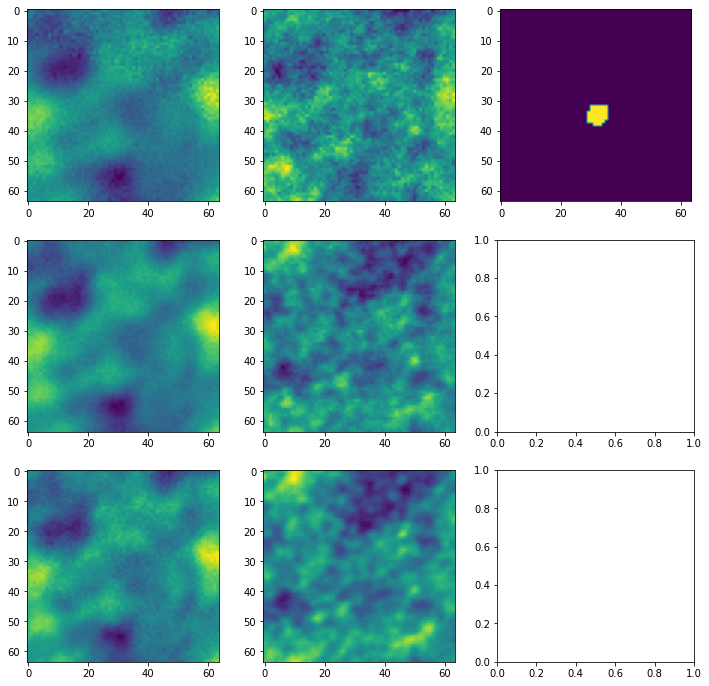

In [5]:
check_gen(test_gen)

In [6]:
filepath='/home/rt2122/Models/planck_z_none/model.ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=500, epochs=30, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9883 - iou: 0.0602 - dice: 0.1205 
Epoch 00001: val_loss improved from inf to 0.17025, saving model to /home/rt2122/Models/planck_z_none/model.ep0001-vl0.170251-l0.056207.h5
500/500 [==============================] - 7855s 16s/step - loss: 0.0562 - accuracy: 0.9883 - iou: 0.0602 - dice: 0.1205 - val_loss: 0.1703 - val_accuracy: 0.9880 - val_iou: 0.0170 - val_dice: 0.0340
Epoch 2/30
315/500 [=================>............] - ETA: 54:02 - loss: 0.0395 - accuracy: 0.9890 - iou: 0.0900 - dice: 0.1801

In [ ]:
check_gen(test_gen, model)

In [ ]:
model.save_weights('/home/rt2122/Models/planck_z_none/model.ep30.h5')